In [1]:
#ML to predict fetal health

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-v0_8-whitegrid')
import scipy.stats as stats 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder ,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler ,LabelEncoder
import xgboost as XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
print('complete')

complete


In [8]:
#Let's start by reading the cleaned dataset

df = pd.read_csv("../Data/Clean/cleaned_df_fetal_health.csv")
df.head()

,baseline_value_FHR(BPM),accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,FHR_min,FHR_max,FHR_n_of_peaks,FHR_n_of_zeros,FHR_mode,FHR_mean,FHR_median,FHR_variance,FHR_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [10]:
#Pivot the data to long format (this assumes you want to pivot all columns except the first one)
df_long = pd.melt(df, var_name='Feature Name', value_name='Feature Value')

# Save the pivoted data to a new CSV file
df_long.to_csv('pivoted_data.csv', index=False)

print("Data has been successfully pivoted and saved to 'pivoted_data.csv'")

Data has been successfully pivoted and saved to 'pivoted_data.csv'


In [18]:
df_long_2 = pd.melt(df, id_vars=['fetal_health'], var_name='Feature', value_name='Value')

# Save the pivoted data to a new CSV file
df_long_2.to_csv('pivoted_data_2.csv', index=False)

print("Data has been successfully pivoted and saved to 'pivoted_data.csv'")

# Optional: Check the first few rows of the pivoted DataFrame to confirm
print(df_long_2.head())

Data has been successfully pivoted and saved to 'pivoted_data.csv'
  fetal_health                  Feature  Value
0      Suspect  baseline_value_FHR(BPM)  120.0
1       Normal  baseline_value_FHR(BPM)  132.0
2       Normal  baseline_value_FHR(BPM)  133.0
3       Normal  baseline_value_FHR(BPM)  134.0
4       Normal  baseline_value_FHR(BPM)  132.0


In [7]:
df['fetal_health'].info


<bound method Series.info of 0       Suspect
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
2108    Suspect
2109    Suspect
2110    Suspect
2111    Suspect
2112     Normal
Name: fetal_health, Length: 2113, dtype: object>

In [31]:
df.columns

Index(['baseline_value_FHR(BPM)', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_abnormal_long_term_variability', 'FHR_width', 'FHR_min',
       'FHR_max', 'FHR_n_of_peaks', 'FHR_n_of_zeros', 'FHR_mode', 'FHR_mean',
       'FHR_median', 'FHR_variance', 'FHR_tendency', 'fetal_health'],
      dtype='object')

In [ ]:
# remake target col numerical to show correlations
import warnings
warnings.filterwarnings('ignore')

df['fetal_health'].replace({'Normal':1,'Suspect':2 ,'Pathological':3},inplace=True)
print(df['fetal_health'].value_counts())
print(df['fetal_health'].dtype)

In [14]:
#solve imbalance problem using smote
# reconvert into objects
df['fetal_health'] = df['fetal_health'].replace({1:'Normal',2:'Suspect' ,3:'Pathological'})
#df['fetal_health'] = df['fetal_health'].astype(object)
X = df.drop('fetal_health', axis=1) 
y = df['fetal_health']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_test= pd.DataFrame(X_test, columns=X.columns)
df['fetal_health'].value_counts()

fetal_health
Normal          1646
Suspect          292
Pathological     175
Name: count, dtype: int64

In [16]:
smote = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train))
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train))

resampled_df = pd.DataFrame(X_train, columns=X.columns)
resampled_df['fetal_health'] = y_train

Before SMOTE: Counter({'Normal': 1316, 'Suspect': 234, 'Pathological': 140})
After SMOTE: Counter({'Normal': 1316, 'Suspect': 1316, 'Pathological': 1316})


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve
bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [30]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

featureScores.to_csv("FeatureImportanceBeforeML.csv")

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                           FHR_mean  298.759569
16                                           FHR_mode  276.382795
18                                         FHR_median  249.699523
1                                       accelerations  194.618345
19                                       FHR_variance  150.955827
0                             baseline_value_FHR(BPM)  137.833999
8                mean_abnormal_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                            FHR_min   86.468440
10                mean_abnormal_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

Text(0.5, 1.0, 'Feature Importance')

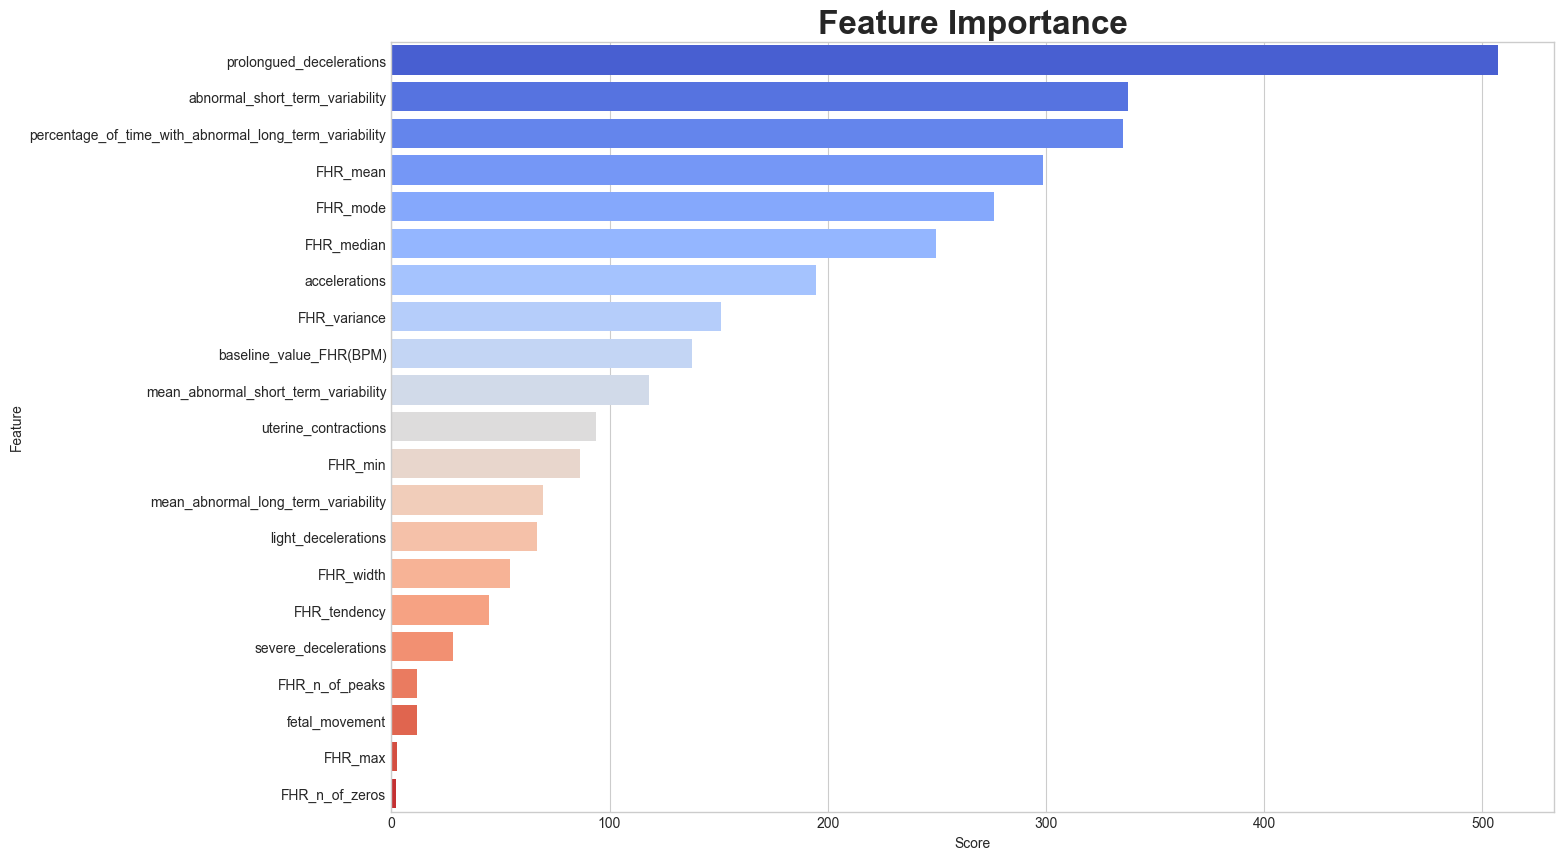

In [24]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')